In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [35]:
palette = sns.color_palette(['#5494da', '#5dcdf9', '#e8e37c', '#f3b595', '#f09895'])

In [36]:
print(os.listdir('..'))
df = pd.read_csv('../data_compare.csv')

['test_sensor.sh~', 'test_HT.sh', 'test_PAMAP2.sh~', 'test_sensor.sh', 'test_fenwick_synthetic.sh', 'test_GeoLife.sh', 'test_varden_fast.sh', 'test_sensor5.sh', 'CMakeLists.txt', 'test_query.sh', 'test_sensor5.sh~', 'test_uniform_fast.sh', 'test_all_synthetic.sh', 'images', 'dataset', 'include', 'tests', 'brutetest.sh', 'test_priority_synthetic.sh', '.gitmodules', 'test_uniform.sh', 'data.csv', 'README.md', 'results', 'test_gowalla.sh', 'test_static_synthetic.sh', '.gitignore', 'test_fenwick_synthetic.sh~', 'data_compare.csv', 'test_all.sh', 'test_PAMAP2.sh', 'test_static_synthetic.sh~', 'test_GeoLife.sh~', 'plot_graphs.py', 'external', '.git', 'test_varden.sh', 'notebooks', 'test_simden_fast.sh', '.idea', 'src']


In [37]:
df.head()

,Algorithm,uniform,simden,varden,GeoLife,PAMAP2,Sensor5,HT,Query,Gowalla
0,DPC-EXACT-BASELINE,91.304667,290.296333,250.227667,NaN,4.647357,2000.410000,814.502000,0.301000,13.567033
1,DPC-APPROX-BASELINE,NaN,6.364173,2072.960000,5.193023,0.026000,115.496333,0.612000,0.014318,NaN
2,DPC-FENWICK,7.073787,3.856930,3.865913,12.250000,0.109520,1.770000,0.524926,0.019033,0.493693
3,DPC-INCOMPLETE,18.264133,11.266533,8.928507,14.950000,5.125087,4.330000,1.205083,0.039303,1.089502
4,DPC-PRIORITY,1.685860,1.387997,1.351220,2.586063,0.557170,0.980000,0.174550,0.006638,0.156174


In [38]:
lll = []
for i, row in df.iterrows():
    ll = [[row['Algorithm'], df.columns[j+1], t] for j,t in enumerate(row[1:])]
    lll += ll
print(lll)
df_new = pd.DataFrame(lll, columns=['Algorithm', 'Dataset', 'Runtime'])

[['DPC-EXACT-BASELINE', 'uniform', 91.30466667], ['DPC-EXACT-BASELINE', 'simden', 290.2963333], ['DPC-EXACT-BASELINE', 'varden', 250.2276667], ['DPC-EXACT-BASELINE', 'GeoLife', nan], ['DPC-EXACT-BASELINE', 'PAMAP2', 4.647356667], ['DPC-EXACT-BASELINE', 'Sensor5', 2000.41], ['DPC-EXACT-BASELINE', 'HT', 814.502], ['DPC-EXACT-BASELINE', 'Query', 0.3009996667], ['DPC-EXACT-BASELINE', 'Gowalla', 13.56703333], ['DPC-APPROX-BASELINE', 'uniform', nan], ['DPC-APPROX-BASELINE', 'simden', 6.364173333], ['DPC-APPROX-BASELINE', 'varden', 2072.96], ['DPC-APPROX-BASELINE', 'GeoLife', 5.193023333], ['DPC-APPROX-BASELINE', 'PAMAP2', 0.026], ['DPC-APPROX-BASELINE', 'Sensor5', 115.4963333], ['DPC-APPROX-BASELINE', 'HT', 0.612], ['DPC-APPROX-BASELINE', 'Query', 0.01431766667], ['DPC-APPROX-BASELINE', 'Gowalla', nan], ['DPC-FENWICK', 'uniform', 7.073786667], ['DPC-FENWICK', 'simden', 3.85693], ['DPC-FENWICK', 'varden', 3.865913333], ['DPC-FENWICK', 'GeoLife', 12.25], ['DPC-FENWICK', 'PAMAP2', 0.1095203333]

In [39]:
df_new.loc[df_new['Runtime'].isnull(), 'Runtime'] = 100000
df_new.head()

,Algorithm,Dataset,Runtime
0,DPC-EXACT-BASELINE,uniform,91.304667
1,DPC-EXACT-BASELINE,simden,290.296333
2,DPC-EXACT-BASELINE,varden,250.227667
3,DPC-EXACT-BASELINE,GeoLife,100000.000000
4,DPC-EXACT-BASELINE,PAMAP2,4.647357


/tmp/ipykernel_30753/2375275775.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', 'INF'])


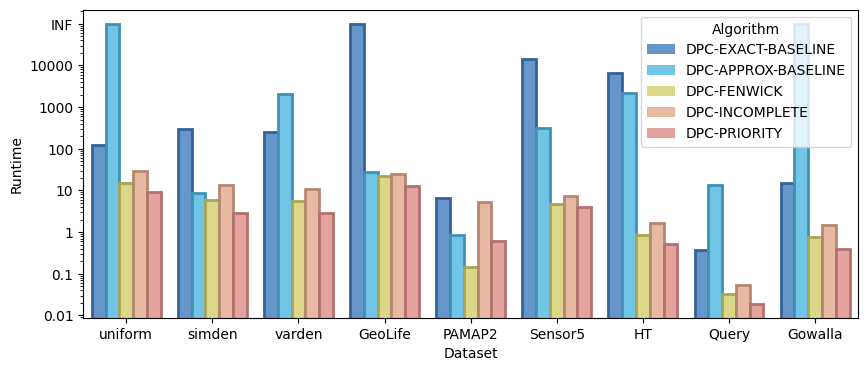

In [59]:
plt.figure(figsize=(10, 4))
g=sns.barplot(data=df_new, x='Dataset', y='Runtime', hue='Algorithm', palette=pal, linewidth=2)
for patch in g.patches:
    clr = np.array(patch.get_facecolor())
    clr[:-1] -= 50/255
    patch.set_edgecolor(clr)
g.set_yscale("log")
g.set_yticklabels(['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000', 'INF'])
plt.savefig('../images/compare_all.png')

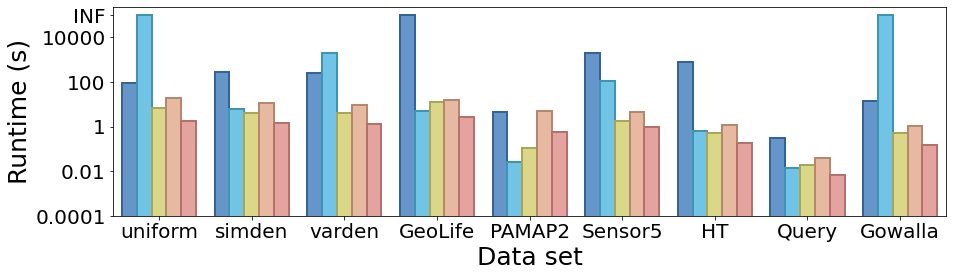

In [40]:
fontsize = 20
fig = plt.figure(figsize=(12, 4))
g=sns.barplot(data=df_new, x='Dataset', y='Runtime', hue='Algorithm', palette=palette, linewidth=2)
for patch in g.patches:
    clr = np.array(patch.get_facecolor())
    clr[:-1] -= 50/255
    patch.set_edgecolor(clr)
plt.ylabel("Runtime (s)", fontsize = fontsize+5)
plt.xlabel("Data set", fontsize = fontsize+5)

g.set_yscale("log")
g.set_yticks([0.0001,  0.01,1,  100,  10000, 1e5])
g.set_yticklabels(['0.0001',  '0.01', '1', '100',  '10000', 'INF'])
plt.legend([],[], frameon=False)
#handles, labels = g.get_legend_handles_labels()
#g.legend(handles, labels, loc=9, ncol=3,bbox_to_anchor=(0.5, 1.4),frameon=False, fontsize = fontsize)#
for l in g.yaxis.get_ticklabels():
    l.set_fontsize(fontsize)
for l in g.xaxis.get_ticklabels():
    l.set_fontsize(fontsize)
    
plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

plt.savefig('../images/compare_dep.pdf', bbox_inches='tight' )